In [ ]:
# method 1 but how to add amount

import json 
import csv
import pandas as pd

with open('Desktop\practice\data-viz-challenge-master\data.json') as file:
    js_data = json.load(file)
    
data12 = 'Desktop\practice\data18.csv'

with open(data12,'w') as file:
    csv_file = csv.writer(file)
    csv_file.writerow(['category','event_name','gender',"marital_status", "session_id","device","amount","age","client_time","location"])
    for item in js_data['data']:
        csv_file.writerow([item['category'],item['event_name'],item['gender'],item["marital_status"],item["session_id"],item["device"],item['amount'],item["age"],item["client_time"],item["location"]])
        

In [97]:
# method 2

import json
import pandas as pd
df = pd.read_json('https://raw.githubusercontent.com/theand9/data-viz-challenge/master/data.json')
table = pd.DataFrame([i for i in df.data])
# table


In [98]:
sport_environment = table[(table.category== 'Sports')|(table.category == 'Environment')]
# or 
sport_enviroment = table[table.category.isin(['Sports','Enviroment'])]
# sport_environment

In [99]:
amount_check = sport_environment[sport_environment.event_name== 'Fund Project']
# amount_check

In [100]:

value = amount_check['gender'].value_counts()
print(value)
value1 = amount_check['age'].value_counts()
print(value1)


F    3893
M    3751
U     624
Name: gender, dtype: int64
18-24    4186
35-44    1032
45-54    1031
55+      1014
25-34    1005
Name: age, dtype: int64


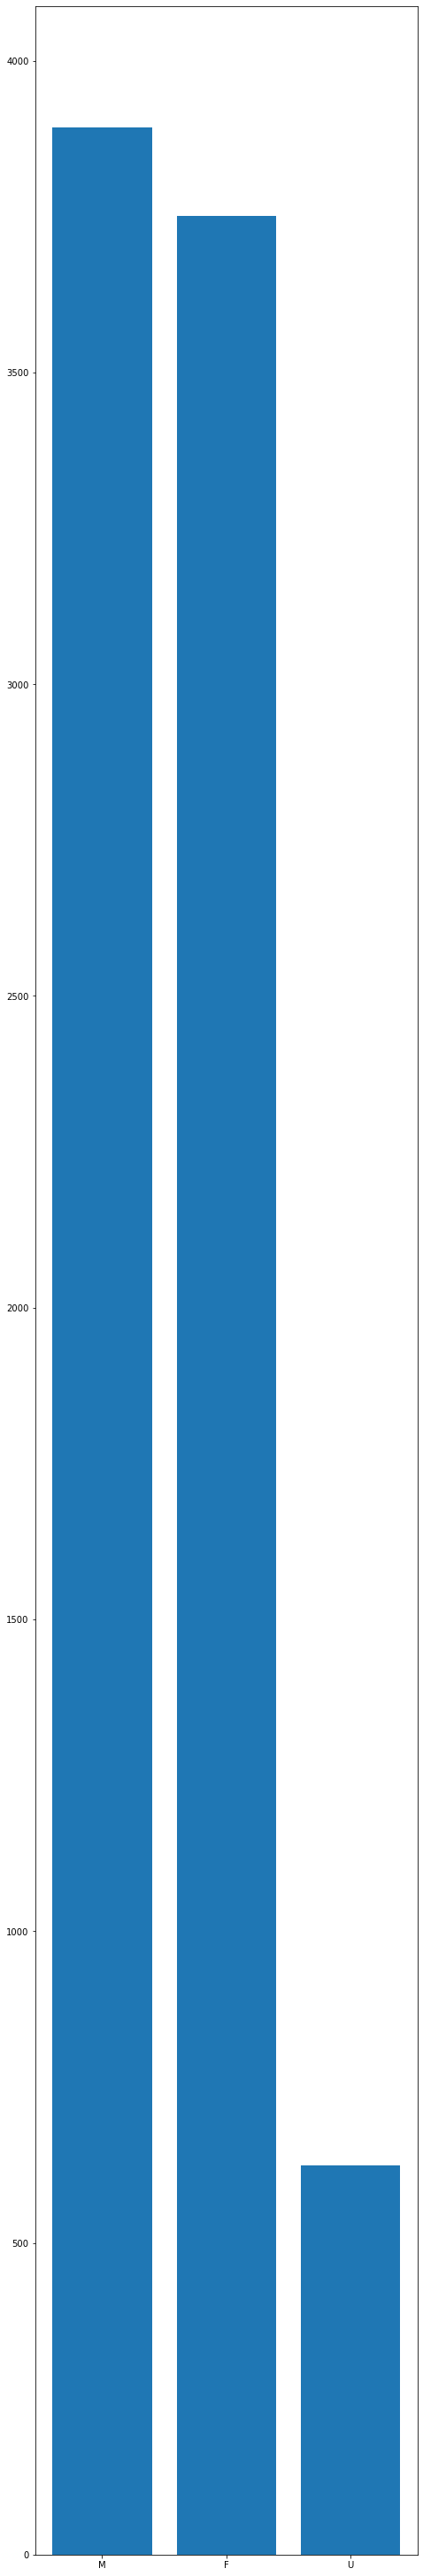

In [101]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,10])
langs = ['M','F','U']
students = [x for x in value]
ax.bar(langs,students)
plt.show()

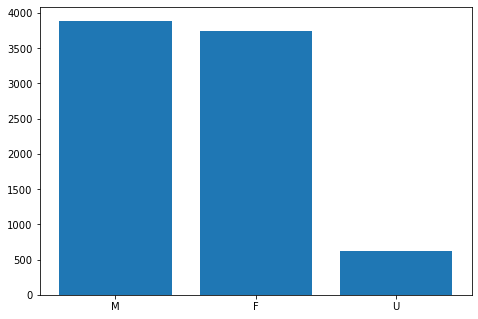

In [102]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['M','F','U']
students = [x for x in value]
ax.bar(langs,students)
plt.show()

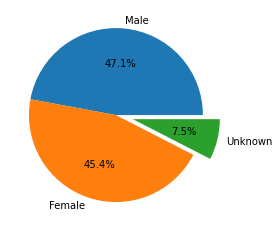

In [103]:
labels ='Male','Female',"Unknown"
data = [x for x in value]
explode = (0,0,0.2)
plt.pie(data,labels =labels,explode=explode,autopct='%1.1f%%')
plt.show()


In [104]:
from collections import Counter 
lat_long = [(lat.get('latitude'),lat.get('longitude')) for lat in amount_check.location]
lat_long
cities = [city.get('city') for city in amount_check.location]
cities = Counter(cities)
cities
state = [state.get('state') for state in amount_check.location]
state = Counter(state)
stat = pd.DataFrame.from_dict(state, orient='index').reset_index()
stat = stat.rename(columns={'index':'state', 0:'count'})
# stat



In [105]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=stat['state'], # Spatial coordinates
    z = stat['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Donors",
))

fig.update_layout(
    title_text = 'Donation heat map of USA',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


In [106]:
from datetime import datetime, date
time = amount_check['client_time']
dates = []
for x in time:
    date = date.fromtimestamp(x)
    dates.append(date)
dates = Counter(dates)
x_counter = []
y_counter =[]
data = pd.DataFrame.from_dict(dates, orient='index').reset_index()
data = data.rename(columns={'index':'time', 0:'count'})
# data

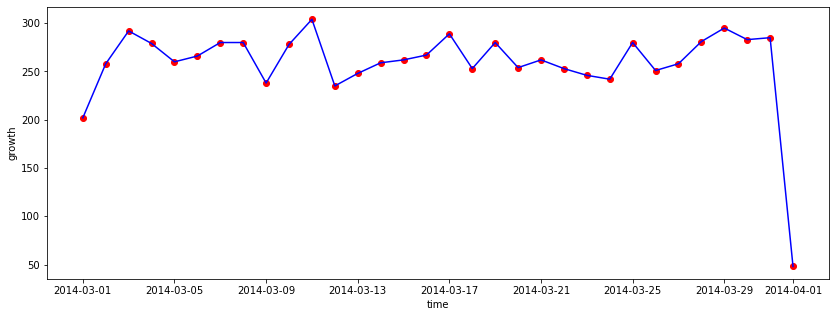

In [107]:
fig = plt.figure(figsize=(14,5))
x= [y for y in data['time']]
y= [x for x in data['count']]

plt.scatter(x,y,color='r',zorder=1)
plt.plot(x,y,color='b',zorder=2)
plt.xlabel('time')
plt.ylabel('growth')
plt.show()

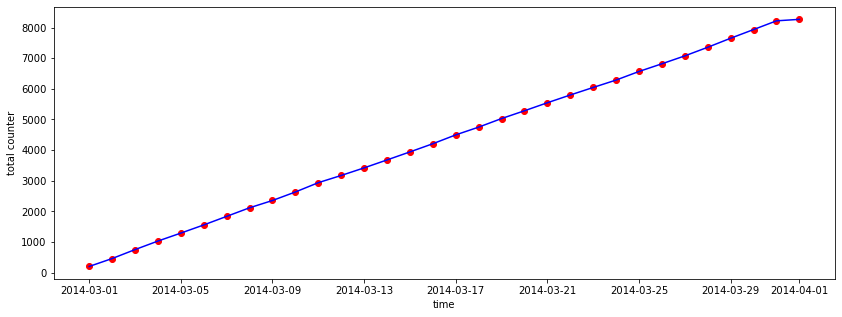

In [108]:
fig = plt.figure(figsize=(14,5))
x= [y for y in data['time']]
ini = 0
lis=[]
for z in data['count']:
    z= z+ini
    lis.append(z)
    ini = z
y = [p for p in lis] 
plt.scatter(x,y,color='r',zorder=1)
plt.plot(x,y,color='b',zorder=2)
plt.xlabel('time')
plt.ylabel('total counter')
plt.show()

In [109]:
amount = amount_check['amount'].value_counts().rename_axis('value').reset_index(name='count')
# amount


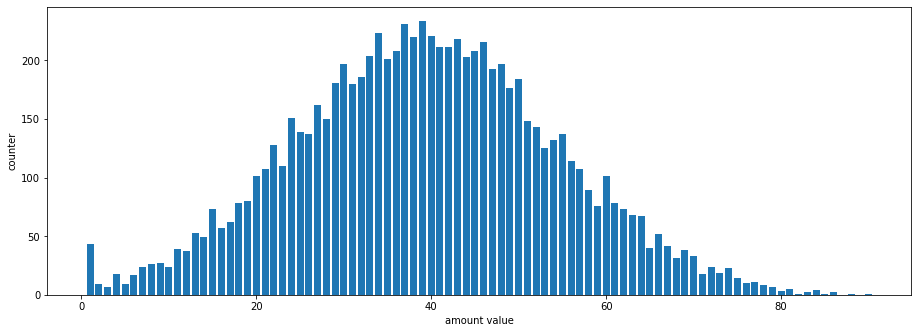

In [110]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
amt = [x for x in amount['value']]
count = [x for x in amount['count']]
ax.bar(amt,count)
plt.xlabel('amount value')
plt.ylabel('counter')
plt.show()


In [111]:
sport_amount = amount_check[(amount_check.category== 'Sports')]
# sport_amount

In [112]:
environment_amount = amount_check[(amount_check.category== 'Environment')]
# environment_amount


162376.0


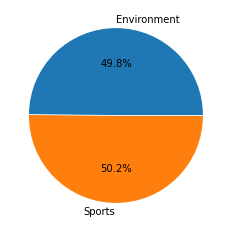

In [113]:
y = 0
for x in environment_amount['amount']:
    env_amt= x + y
    y = env_amt
y= 0
for x in sport_amount['amount']:
    sport_amt= x + y
    y = sport_amt
print(env_amt)  

labels = 'Environment', "Sports"
data = [env_amt, sport_amt]
explode = (0,0.01)
plt.pie(data,labels =labels,explode=explode,autopct='%1.1f%%')
plt.show()

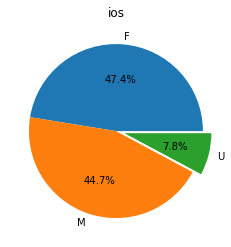

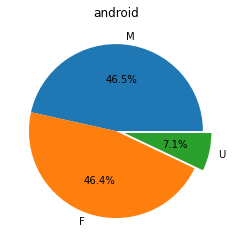

In [114]:
device_andro = amount_check[(amount_check.device== 'android')]
device_ios = amount_check[(amount_check.device== 'iOS')]

andro_gender = device_andro['gender'].value_counts()
ios_gender = device_ios['gender'].value_counts()


labels = 'F', "M", 'U'
data = [x for x  in ios_gender ]
explode = (0,0,0.1)
plt.pie(data,labels =labels,explode=explode,autopct='%1.1f%%')
plt.title('ios')
plt.show()

labels = "M","F", 'U'
data = [x for x  in andro_gender ]
explode = (0,0,0.1)
plt.pie(data,labels =labels,explode=explode,autopct='%1.1f%%')
plt.title('android')
plt.show()


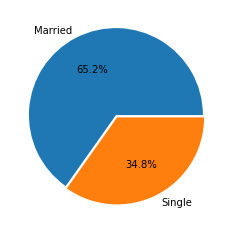

In [115]:
married = amount_check[amount_check.marital_status=='married']
single = amount_check[amount_check.marital_status=='single']

y = 0
for x in married['amount']:
    married_amt= x + y
    y = married_amt
y= 0
for x in single['amount']:
    single_amt= x + y
    y = single_amt

labels = 'Married',"Single"
data = [married_amt, single_amt ]
explode = (0,0.03)
plt.pie(data,labels =labels,explode=explode,autopct='%1.1f%%')
plt.show()